# **STUDI LITERATUR**

Penjelasan Masalah dan Alasan Menggunakan Model

dataset tentang penyakit jantung yang didasari penyakit jantung adalah penyakit dengan tingkat kematian tertinngi di dunia sehingga diperlukan suatu metode untuk dapat mendeteksi tahap awal dari penyakit jantung agar dapat meminimalisir tingkat kematian. Model yang ingin digunakan adalah random forest dan data akan direduksi menggunakan pca dengan tujuan untuk menggurangi vaiabel dan memililih komponen utama dalam data yang diharapkan dapat meningkatkan akurasi model sehingga dapat memperoleh akurasi yang lebih baik.

# **PENGUMPULAN DATA**

Data didapat dari kaggle yaitu data pasien penyakit gagal jantung

**Import Library**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# **DATA PREPROCESSING**

**Pengecekan Data**

In [3]:
#Read Data
df  = pd.read_csv("/content/heart_failure_clinical_records_dataset.csv")
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
#Kolom data
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [5]:
#info data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    int64  
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(2), int64(11)
memory usage: 30.5 KB


In [6]:
#cek missing value
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

tidak ada missing value maka data sudah layak untuk dinormalisasi

**NORMALISASI**

In [7]:
#normalisasi
x = df.iloc[:, :-1]
y = df.iloc[:, -1].values

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(x)
standarized_data = scaler.transform(x)
X = standarized_data
print(X)

[[0.63636364 0.         0.07131921 ... 1.         0.         0.        ]
 [0.27272727 0.         1.         ... 1.         0.         0.00711744]
 [0.45454545 0.         0.01569278 ... 1.         1.         0.01067616]
 ...
 [0.09090909 0.         0.25988773 ... 0.         0.         0.97508897]
 [0.09090909 0.         0.30492473 ... 1.         1.         0.98220641]
 [0.18181818 0.         0.02207196 ... 1.         1.         1.        ]]


# **PEMBAGIAN DATA LATIH DAN DATA UJI RANDOM FOREST**

# **MODEL RANDOM FOREST**

In [8]:
#SPLIT
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42, stratify=y)

In [9]:
print(X.shape, x_train.shape, x_test.shape)

(299, 12) (209, 12) (90, 12)


In [10]:
print(y_train)

[1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 0 1 1 1 0 1 1 0 1
 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 1 1
 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1 0 1 1 0 1 0 0 1 0 0 0 1 0 0 0
 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1
 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0]


**Random Forest Tanpa Tuning**

In [11]:
rf1 = RandomForestClassifier()
model = rf1.fit(x_train, y_train)

In [12]:
#Accuracy on training data
y_train_pred = model.predict(x_train)
training_data_accuracy = accuracy_score(y_train,y_train_pred)
print("Accuracy on training data :", training_data_accuracy)

#Accuracy on training data
y_test_pred = model.predict(x_test)
test_data_accuracy = accuracy_score(y_test,y_test_pred)
print("Accuracy on test data :", test_data_accuracy)

Accuracy on training data : 1.0
Accuracy on test data : 0.8444444444444444


Akurasi data latih 100% dan data uji 85%, hal ini kemungkinanan terjadi overfitting dimana model terlalu baik dalam latih namun kurang baik dalam tes. Untuk menghindari terjadinya overfitting akan dilakukan tunning parameter random forest.

In [13]:
#mengecek apakah data overfitting atau tidak dengan cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

cv = KFold(n_splits = 10, shuffle=True)
scores = cross_val_score(rf1,x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)

print(scores)
print("Average Cross Validation Accuracy: %0.3f " % (scores.mean()))
print("STD Cross Validation Accuracy: %0.3f " % (scores.std()))

[0.9047619  0.9047619  0.80952381 0.85714286 0.80952381 0.9047619
 0.80952381 0.85714286 0.9047619  0.9       ]
Average Cross Validation Accuracy: 0.866 
STD Cross Validation Accuracy: 0.041 


Dengan menggunakan teknik ini, kita dapat memperoleh estimasi yang lebih akurat dari performa model pada data yang belum pernah dilihat sebelumnya (test set) dan menghindari overfitting pada data pelatihan (train set). Hal ini karena cross-validation memungkinkan kita untuk melakukan evaluasi performa model pada data yang berbeda pada setiap iterasi, sehingga menghasilkan estimasi performa yang lebih stabil dan konsisten.

Rata-rata dari 10 fold didapatkan akurasi data latih adalah 83,3% yang menunjukkan bahwa data latih sebelumnya overfitting, sehingga langak yang dapat dilakukan adalah dengan tuning hyperparameter.

**Random Forest Dengan Tuning**

**RANDOM SEARCH CV**

In [14]:
from sklearn.model_selection import RandomizedSearchCV

parameter = {
    'n_estimators':range(10,100),
    'criterion': ['gini', 'entropy'],
    'max_features':['auto','sqrt','log2'],
    'max_depth': range(1,100),
    'min_samples_leaf': range(0,8),
    'min_samples_split': range(1,10),
}

rs_cv = RandomizedSearchCV(estimator=RandomForestClassifier(), param_distributions=parameter, cv=cv, n_jobs = -1, scoring='accuracy')


In [15]:
rs_cv.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=True),
                   estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(1, 100),
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': range(0, 8),
                                        'min_samples_split': range(1, 10),
                                        'n_estimators': range(10, 100)},
                   scoring='accuracy')

In [16]:
print('Accuracy Score: {:.5f}' .format(rs_cv.best_score_))
print('with best parameters: {}.\n' .format(rs_cv.best_params_))

Accuracy Score: 0.86167
with best parameters: {'n_estimators': 94, 'min_samples_split': 6, 'min_samples_leaf': 7, 'max_features': 'log2', 'max_depth': 33, 'criterion': 'gini'}.



In [18]:
rf2 = RandomForestClassifier(n_estimators=94, min_samples_split=6, min_samples_leaf=7,max_features='log2',
                             max_depth=33,criterion='gini')
rf2.fit(x_train, y_train)

RandomForestClassifier(max_depth=33, max_features='log2', min_samples_leaf=7,
                       min_samples_split=6, n_estimators=94)

Training set accuracy:  0.9186602870813397
Test set accuracy:  0.8555555555555555

              precision    recall  f1-score   support

           0       0.84      0.97      0.90        61
           1       0.90      0.62      0.73        29

    accuracy                           0.86        90
   macro avg       0.87      0.79      0.82        90
weighted avg       0.86      0.86      0.85        90



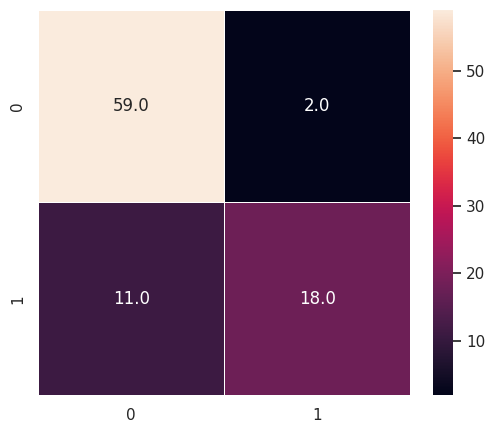

In [19]:
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
y_pred_train = rf2.predict(x_train)
y_pred_test = rf2.predict(x_test)

print('Training set accuracy: ', accuracy_score(y_train, y_pred_train))
print('Test set accuracy: ', accuracy_score(y_test, y_pred_test))
print('')

cm = metrics.confusion_matrix(y_test, y_pred_test)
f,ax = plt.subplots(figsize=(6, 5))
sns.heatmap(cm, annot=True, linewidths=.5, fmt= '.1f',ax=ax);

results = metrics.classification_report(y_test, y_pred_test)
print(results)

In [20]:
TP = cm[0,0] #true positif
TN = cm[1,1] #true negatif
FP = cm[0,1] #false positif
FN = cm[1,0] #false negatif

accuracy = (TP+TN) / float(TP+TN+FP+FN)
print('Akurasi Klasifikasi : {0:0.4f}'.format(accuracy))

class_error = (FP+FN) / float(TP+TN+FP+FN)
print('\nKesalahan Klasifikasi : {0:0.4f}'.format(class_error))

precision = TP / float(TP + FP)
print('\nPresisi : {0:0.4f}'.format(precision))

recall = TP / float(TP + FN)
print('\nSensitivitas : {0:0.4f}'.format(recall))

Akurasi Klasifikasi : 0.8556

Kesalahan Klasifikasi : 0.1444

Presisi : 0.9672

Sensitivitas : 0.8429


0.9033352176370831


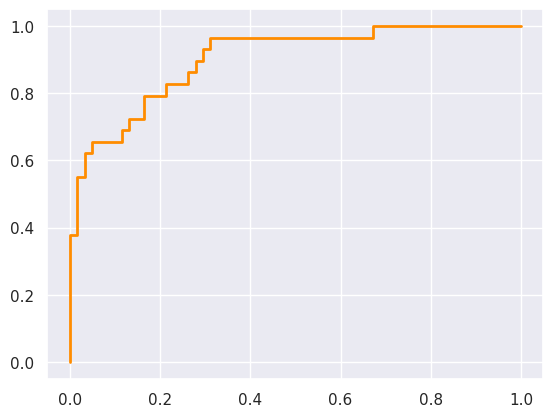

In [21]:
from sklearn.metrics import roc_auc_score, roc_curve
y_pred_prob = rf2.predict_proba(x_test)[:, 1] # clf adalah model klasifikasi yang telah dilatih pada data train
roc_auc = roc_auc_score(y_test, y_pred_prob) # y_test adalah label sebenarnya pada data test

# Menghitung false positive rate (FPR) dan true positive rate (TPR) pada data test
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Membuat plot kurva ROC
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC')
print(roc_auc)

# **PREDIKSI MODEL**

In [22]:
input_data = (80, 0, 898, 0, 25, 0, 149000, 1.1, 144, 1, 1, 87)

# Ubah input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = rf2.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('PASIEN TERDETEKSI SELAMAT')
else:
  print('PASIEN TERDETEKSI MENINGGAL')

[0]
PASIEN TERDETEKSI SELAMAT


SAVING MODEL

In [27]:
import pickle

In [28]:
filename = 'heart_failure_model.sav'
pickle.dump(rf2, open(filename, 'wb'))

In [29]:
# loading the saved model
loaded_model = pickle.load(open('heart_failure_model.sav', 'rb'))

In [30]:
input_data = (72, 1, 328, 0, 30, 1, 621000, 1.7, 138, 0, 1, 88)

# Ubah input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = rf2.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('PASIEN TERDETEKSI SELAMAT')
else:
  print('PASIEN TERDETEKSI MENINGGAL')

[1]
PASIEN TERDETEKSI MENINGGAL
